In [1]:
#download necessary packages
%pip install pandas geopandas matplotlib rioxarray xarray

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib
from glob import glob

In [3]:
#Read data
df2016 = pd.read_csv('2016.csv')
df2021 = pd.read_csv('2021.csv')

In [20]:
df_2016

,DAUID,DA name,Population,English Only,French Only,English and French,Neither,Work language: English,Work language: French,Non-immigrants,Immigrants
0,2466,0,1942044,220425.0,517445.0,1131680.0,45205.0,292300.0,609070.0,1187260.0,644685.0
1,24660001,1,657,0.0,325.0,260.0,5.0,0.0,345.0,570.0,35.0
2,24660002,2,534,0.0,275.0,240.0,5.0,15.0,250.0,395.0,70.0
3,24660003,3,303,0.0,165.0,135.0,0.0,10.0,155.0,320.0,0.0
4,24660004,4,283,0.0,150.0,125.0,5.0,0.0,200.0,280.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
3198,24663445,3445,1469,110.0,175.0,1175.0,10.0,345.0,700.0,990.0,430.0
3199,24663450,3450,491,25.0,105.0,350.0,10.0,75.0,190.0,255.0,165.0
3200,24663451,3451,428,20.0,95.0,305.0,10.0,55.0,225.0,360.0,75.0
3201,24663452,3452,1602,450.0,80.0,1010.0,60.0,400.0,400.0,625.0,675.0


In [4]:
#modify headers and separaters
my_sep = ","
my_headers = ["DAUID",
"DA name",
"Population",
"English Only",
"French Only",
"English and French",
"Neither",
"Work language: English",
"Work language: French",
"Non-immigrants",
"Immigrants"]
df_2016 = pd.read_csv("2016.csv", sep = my_sep, header = 0, names = my_headers)
df_2021 = pd.read_csv("2021.csv", sep = my_sep, header = 0, names = my_headers)

In [19]:
df_2016.rename(columns={"COL2": "pop16"}, inplace = True)

In [5]:
gdf_da2016 = gpd.read_file('2016.shp')
gdf_da2021 = gpd.read_file('2021.shp')

In [6]:
#convert geodatabase DAUID to a number value

to_convert = {'DAUID': 'int64'}
gdf_da2016 = gdf_da2016.astype(to_convert)
gdf_da2021 = gdf_da2021.astype(to_convert)

In [7]:
#############gdf_da2021.dtypes

In [8]:
gdf_da_mtl2016 = gdf_da2016.loc[(gdf_da2016['DAUID'] >= 24661006) & (gdf_da2016['DAUID'] <= 24663453)]
gdf_da_mtl2016

,DAUID,PRUID,PRNAME,CDUID,CDNAME,CDTYPE,CCSUID,CCSNAME,CSDUID,CSDNAME,...,SACCODE,SACTYPE,CMAUID,CMAPUID,CMANAME,CMATYPE,CTUID,CTNAME,ADAUID,geometry
10079,24661006,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,462,1,462,24462,Montréal,B,4620092.00,0092.00,24660213,"POLYGON ((7631081.754 1238771.397, 7631233.543..."
10080,24661007,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,462,1,462,24462,Montréal,B,4620092.00,0092.00,24660213,"POLYGON ((7631098.286 1238390.403, 7631038.949..."
10081,24661008,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,462,1,462,24462,Montréal,B,4620092.00,0092.00,24660213,"POLYGON ((7630810.317 1238610.629, 7630868.189..."
10082,24661009,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,462,1,462,24462,Montréal,B,4620092.00,0092.00,24660213,"POLYGON ((7630913.634 1238280.943, 7630846.934..."
10083,24661010,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,462,1,462,24462,Montréal,B,4620092.00,0092.00,24660213,"POLYGON ((7630713.409 1238163.786, 7630646.814..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15404,24662574,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,462,1,462,24462,Montréal,B,4620278.00,0278.00,24660078,"POLYGON ((7622722.034 1248769.854, 7622717.986..."
15405,24662575,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,462,1,462,24462,Montréal,B,4620278.00,0278.00,24660078,"POLYGON ((7622760.649 1249148.823, 7622751.606..."
15406,24662576,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,462,1,462,24462,Montréal,B,4620278.00,0278.00,24660078,"POLYGON ((7622740.189 1248932.791, 7622735.337..."
15407,24662577,24,Quebec / Québec,2466,Montréal,TÉ,2466023,Montréal,2466023,Montréal,...,462,1,462,24462,Montréal,B,4620278.00,0278.00,24660078,"POLYGON ((7623023.600 1249121.623, 7623012.920..."


In [9]:
gdf_da_mtl2021 = gdf_da2021.loc[(gdf_da2021['DAUID'] >= 24661006) & (gdf_da2021['DAUID'] <= 24663497)]
gdf_da_mtl2021

,DAUID,DGUID,LANDAREA,PRUID,geometry
12732,24661006,2021S051224661006,0.0337,24,"POLYGON ((7631256.391 1238485.197, 7631200.806..."
12733,24661007,2021S051224661007,0.0479,24,"POLYGON ((7631098.286 1238390.403, 7631038.949..."
12734,24661008,2021S051224661008,0.0229,24,"POLYGON ((7631038.949 1238355.309, 7630976.209..."
12735,24661009,2021S051224661009,0.0498,24,"POLYGON ((7630913.634 1238280.943, 7630846.934..."
12736,24661010,2021S051224661010,0.0642,24,"POLYGON ((7630713.409 1238163.786, 7630646.814..."
...,...,...,...,...,...
15023,24663493,2021S051224663493,0.0475,24,"POLYGON ((7633093.583 1244021.440, 7633071.600..."
15024,24663494,2021S051224663494,0.2098,24,"POLYGON ((7623207.506 1245583.311, 7623206.003..."
15025,24663495,2021S051224663495,0.0403,24,"POLYGON ((7622418.289 1245342.769, 7622458.557..."
15026,24663496,2021S051224663496,0.0176,24,"POLYGON ((7623471.114 1244281.851, 7623512.169..."


In [10]:
#creating merged dataframes
merged_gdf2016 = pd.merge(gdf_da2016, df_2016)
merged_gdf2021 = pd.merge(gdf_da2021, df_2021)

In [11]:
#resizing 
proj_merged_gdf2016 = merged_gdf2016.to_crs('EPSG:2950')
proj_merged_gdf2021 = merged_gdf2016.to_crs('EPSG:2950')

<Axes: >

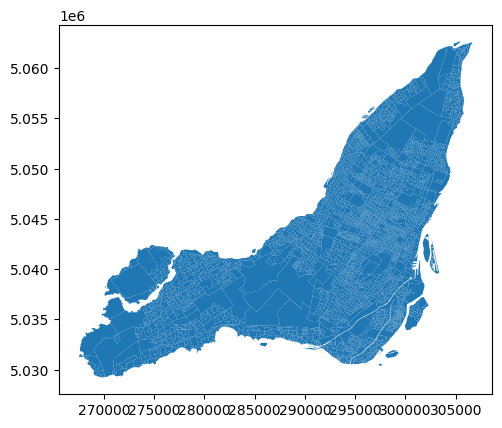

In [12]:
proj_merged_gdf2016.plot()

<Axes: >

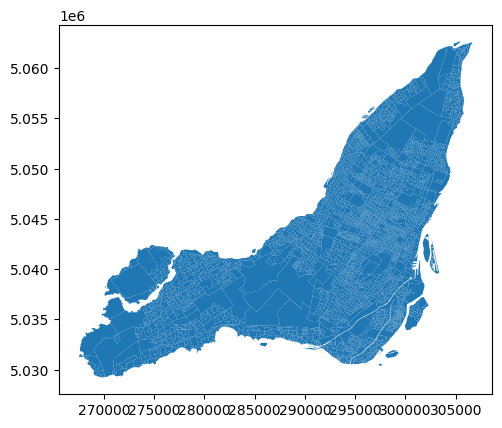

In [13]:
proj_merged_gdf2021.plot()

In [22]:
proj_merged_gdf2016['percEng']= round(((proj_merged_gdf2016['English Only']/proj_merged_gdf2016['pop16'])),2)

KeyError: 'pop16'